### Analysing insurance based on  health and other factors.

### Context-
#### we have been given data about a number of customers or patients and we have to predict the yearly insurance based on the factors affecting it.

### The Analysis -

#### 1) Importing libraries and understanding the dataset :

In [ ]:
#importing the libraries-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# mounting the drive to google colab so we can get the dataset-

from google.colab import drive
drive.mount('/content/drive/')
!ls "/content/drive/My Drive/data science"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
 Archive				   fedex.csv
'Bank Customer Churn Prediction (1).csv'   IMG_20210302_160336.jpg
 Chilli_Disease.ipynb			   insurance.csv
'Face Recognition.ipynb'		  'Mahesh Resume.pdf'


In [ ]:
# the dataset to be used-

insurance = pd.read_csv( "/content/drive/My Drive/data science/insurance.csv")

In [ ]:
# the dataset-

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# the shape of dataset-

insurance.shape

(1338, 7)

Inference-

The dataset hass 1338 rows and 7 columns.

In [ ]:
# information regarding the dataset-

insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Inference-

The dataset has datatype:

2 columns of float type

2 columns integer type

3 columns object type.

The entries-1338

In [ ]:
# describing numerical columns-

insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Inference-

  age,bmi,children,charges are the numerical columns described above along with their mean,min and max.

In [ ]:
# The name of columns present in the dataset-

insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## 2) Cleaning the dataset :

### a) Checking null values if present-

In [ ]:
# null values in dataset-

insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Inference-

There are 0 null values present in dataset.

### b) checking for duplicate values-

In [ ]:
# the duplicate values-

insurance.duplicated().sum()

1

Inference-

There are 1 duplicate value present in dataset.

In [ ]:
# dropping the duplicate from the dataset-

insurance.drop_duplicates(inplace=True)

Inference-

dropping the duplicate value.

### 3) Exploratory Data Analysis :

insurance is the target variable.The reason is that these variables have a direct or indirect relationship with the target variable.

In [ ]:
# the unique values from every column in the dataset-

insurance.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [ ]:
# distinct values in age column-

insurance.age.value_counts()

18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

Inference-

These values need to be binned because only then it will give clear picture in the analysis.

In [ ]:
# binning column into bins-

insurance['Age-group'] = pd.cut(insurance['age'], bins=[17,25,35,45,55,65],labels= ['17-25years','25-35years','35-45years','45-55years','55-65years'])

In [ ]:
# distinct values in age-group column- 

insurance['Age-group'].value_counts()

17-25years    305
45-55years    284
25-35years    268
35-45years    264
55-65years    216
Name: Age-group, dtype: int64

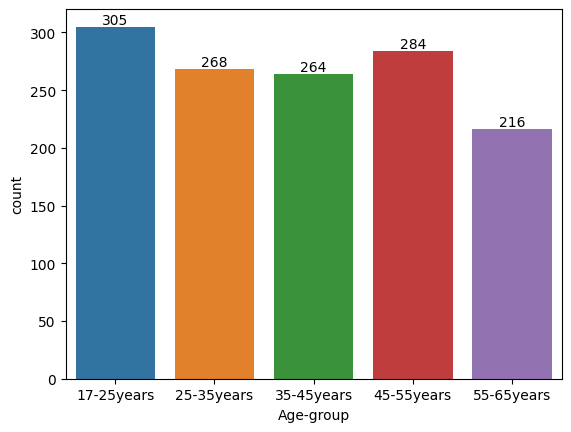

In [ ]:
#plotting the age-group column to analyse the distribution in it-

ax =sns.countplot(x ='Age-group', data = insurance)
ax.bar_label(ax.containers[0])
plt.show()

Inference-

The age group of 30 to 50 years old is a significant demographic for purchasing insurance due to several factors. These individuals often have increased responsibilities, such as starting a family or advancing in their careers, which heightens their awareness of the need for financial protection. As they age, health concerns become more prominent, and insurance provides coverage for medical expenses and potential high costs. With financial stability and long-term planning in mind, people in this age range seek insurance to safeguard their assets and secure their future. Additionally, their risk perception and the availability of insurance products tailored to their needs further contribute to their decision to purchase insurance.

In [ ]:
# distinct values in sex column-

insurance.sex.value_counts()

male      675
female    662
Name: sex, dtype: int64

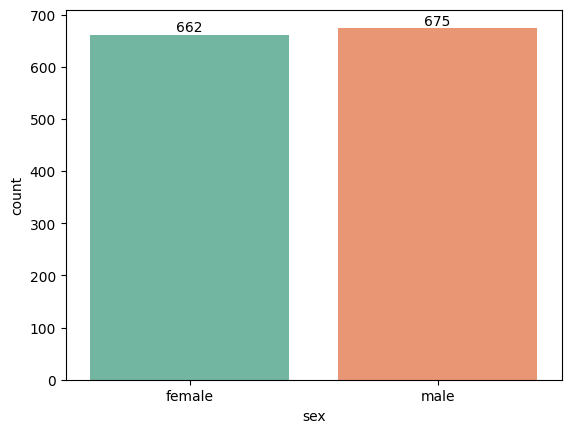

In [ ]:
#plotting the sex column to analyse the distribution in it-

ax = sns.countplot(x= 'sex',data=insurance,palette='Set2')
ax.bar_label(ax.containers[0])
plt.show()

Inference-

we can observe that there are equal number of male and female patients.

In [ ]:
# distinct values in bmi column-

insurance.bmi.value_counts()

32.30    13
28.31     9
30.80     8
31.35     8
28.88     8
         ..
46.20     1
23.80     1
44.77     1
32.12     1
30.97     1
Name: bmi, Length: 548, dtype: int64

Inference-

These values need to be binned because only then it will give clear picture in the analysis.

In [ ]:
# binning column into bins-

insurance['BMI'] = pd.cut(insurance['bmi'],bins= [15.8,18.5,24.9,29.9,34.9,39.9,55],labels=['15.8-18.5','18.5-24.9','24.9-29.9','29.9-34.9','34.9-39.9','>40'])

In [ ]:
# distinct values in BMI column-

insurance.BMI.value_counts()

29.9-34.9    396
24.9-29.9    380
34.9-39.9    226
18.5-24.9    221
>40           93
15.8-18.5     21
Name: BMI, dtype: int64

In [ ]:
# creating a copy of BMI  column-

insurance['Health'] = insurance['BMI']

In [ ]:
# defining a function to replace values-

def categorize_bmi(health):
    if health == '15.8-18.5':
        return 'Under Weight'
    elif health == '18.5-24.9':
        return 'Normal'
    elif health == '24.9-29.9':
        return 'Over Weight'
    elif health == '29.9-34.9':
        return 'Obesity (class 1)'
    elif health == '34.9-39.9':
        return 'Obesity (class 2)'
    elif health == '>40':
        return 'Extreme Obesity'

In [ ]:
insurance['Health'] = insurance['Health'].apply(categorize_bmi)

In [ ]:
insurance


,age,sex,bmi,children,smoker,region,charges,Age-group,BMI,Health
0,19,female,27.900,0,yes,southwest,16884.92400,17-25years,24.9-29.9,Over Weight
1,18,male,33.770,1,no,southeast,1725.55230,17-25years,29.9-34.9,Obesity (class 1)
2,28,male,33.000,3,no,southeast,4449.46200,25-35years,29.9-34.9,Obesity (class 1)
3,33,male,22.705,0,no,northwest,21984.47061,25-35years,18.5-24.9,Normal
4,32,male,28.880,0,no,northwest,3866.85520,25-35years,24.9-29.9,Over Weight
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,45-55years,29.9-34.9,Obesity (class 1)
1334,18,female,31.920,0,no,northeast,2205.98080,17-25years,29.9-34.9,Obesity (class 1)
1335,18,female,36.850,0,no,southeast,1629.83350,17-25years,34.9-39.9,Obesity (class 2)
1336,21,female,25.800,0,no,southwest,2007.94500,17-25years,24.9-29.9,Over Weight


In [ ]:
# distinct values in Health column-

insurance.Health.value_counts()

Obesity (class 1)    396
Over Weight          380
Obesity (class 2)    226
Normal               221
Extreme Obesity       93
Under Weight          21
Name: Health, dtype: int64

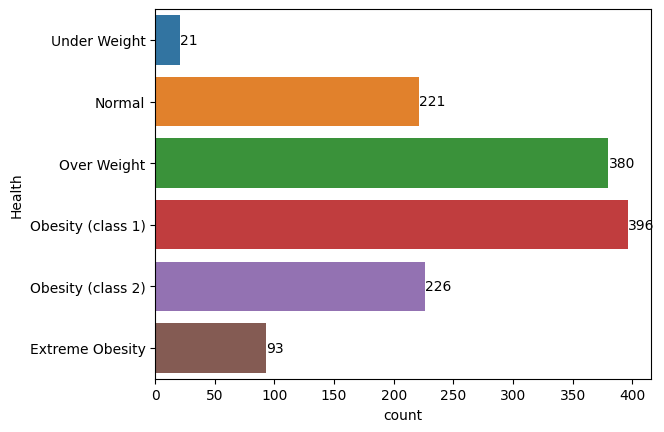

In [ ]:
#plotting the sex column to analyse the distribution in it-

ax = sns.countplot(y = 'Health', data=insurance)
ax.bar_label(ax.containers[0])
plt.show()

Inference-

The majority of patients are classified as obese (class 1), followed by overweight and obese (class 2), and those within the normal weight range. Obesity and overweight conditions are directly linked to an increased risk of heart diseases. Since the treatment for heart ailments can be quite expensive, many people choose to opt for insurance coverage. Insurance provides financial protection by covering a significant portion of the medical expenses associated with heart diseases, including medication, surgeries, hospitalization, and long-term management. By having insurance, individuals can alleviate the financial burden of these treatments and focus on their recovery and well-being.

In [ ]:
# distinct values in children column-

insurance.children.value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

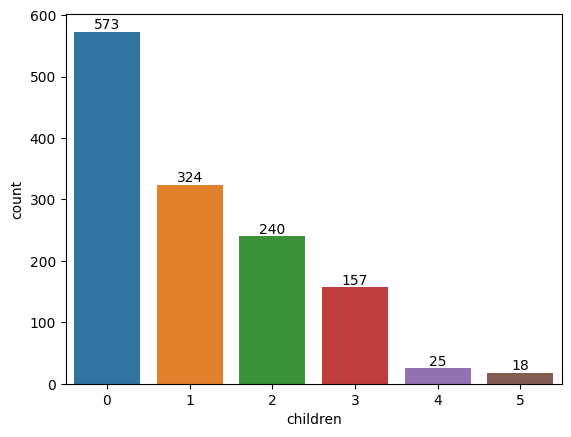

In [ ]:
#plotting the children column to analyse the distribution in it-

ax = sns.countplot(x= 'children',data=insurance)
ax.bar_label(ax.containers[0])
plt.show()

Inference-

The observation reveals that most patients have no children, followed by those with one, two, and three children, with a decreasing trend. This shift can be attributed to various factors, including changing societal norms and individual choices. Modern family planning practices, economic considerations, career and lifestyle priorities, evolving gender roles, urbanization, and increased education and awareness about reproductive health all contribute to the decision to have fewer children. This trend reflects a conscious effort by individuals and couples to make informed choices and maintain a better balance between personal and professional responsibilities.

In [ ]:
# distinct values in smoker column-

insurance.smoker.value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

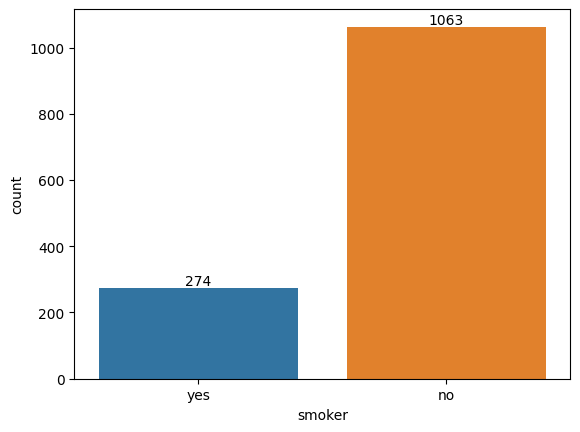

In [ ]:
#plotting the children column to analyse the distribution in it-

ax = sns.countplot(x = 'smoker',data=insurance)
ax.bar_label(ax.containers[0])
plt.show()

Inference-

The majority of patients being non-smokers can be attributed to increased health consciousness, anti-smoking campaigns, social stigma, awareness of health benefits, peer influence, family history, and the implementation of anti-smoking policies. Individuals are more aware of the detrimental health effects of smoking, and public health initiatives have successfully educated and discouraged people from smoking. Additionally, social disapproval and the desire for better health outcomes motivate individuals to abstain from smoking. Family and peer influences, as well as anti-smoking policies, further contribute to the trend of a larger number of non-smoking patients.

In [ ]:
# distinct values in region column-

insurance.region.value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

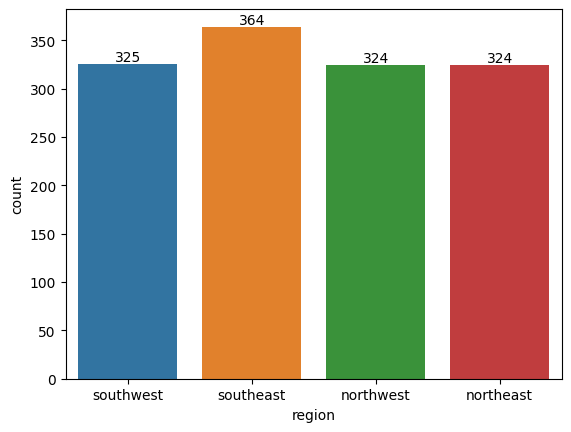

In [ ]:
#plotting the region column to analyse the distribution in it-

ax = sns.countplot(x='region',data=insurance)
ax.bar_label(ax.containers[0])
plt.show()

Inference-

we have alomst equal number of patients for each of these locations.

In [ ]:
# reindexing the columns-

insurance = insurance.reindex(columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region','Age-group','Health','charges'])

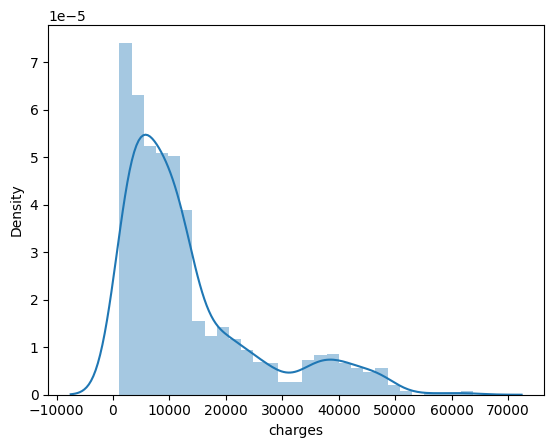

In [ ]:
#plotting the charges column to analyse the distribution in it-

sns.distplot(insurance['charges'])
plt.show()

Inference-

The range of insurance charges observed, from 2000 to 70000 rupees, can be attributed to factors such as coverage and benefits provided by the policy, age and health factors, risk assessment, deductibles and co-payments, market competition, insurance type and duration, and regional factors. Insurance charges vary based on the level of coverage offered, the individual's age and health profile, and the assessed risk. Deductibles, co-payments, and market competition also influence charges. Additionally, regional factors and the type and duration of insurance coverage play a role in determining the range of charges. It is important to consider these factors when selecting an insurance policy.

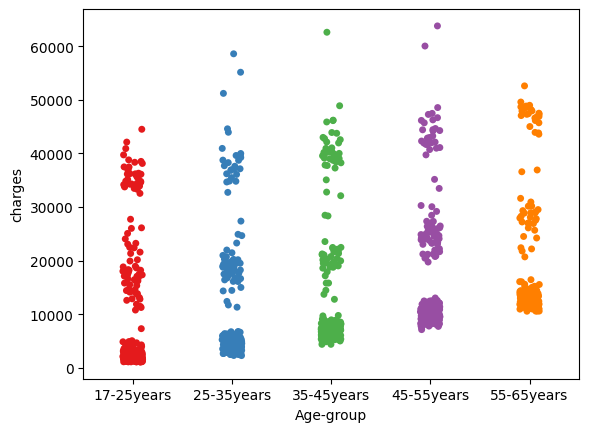

In [ ]:
# plotting the graph-

sns.stripplot(x= 'Age-group',y= 'charges',data=insurance,palette='Set1')
plt.show()

Inference-

As individuals age, both base charges and higher charges for insurance tend to increase. This is due to several factors, including the increased health risks associated with aging and the higher utilization of healthcare services by older individuals. With age, the likelihood of developing chronic diseases and the need for specialized care and medications also rise, leading to higher medical expenses. Actuarial risk assessment models consider age as a factor in determining insurance charges, reflecting the increased likelihood of claims and associated costs. Additionally, the accumulation of pre-existing conditions and the longer coverage period required for older individuals contribute to the higher charges. It's important to consider individual health status, lifestyle choices, and the specific terms of the insurance policy when assessing the relationship between age and insurance charges.

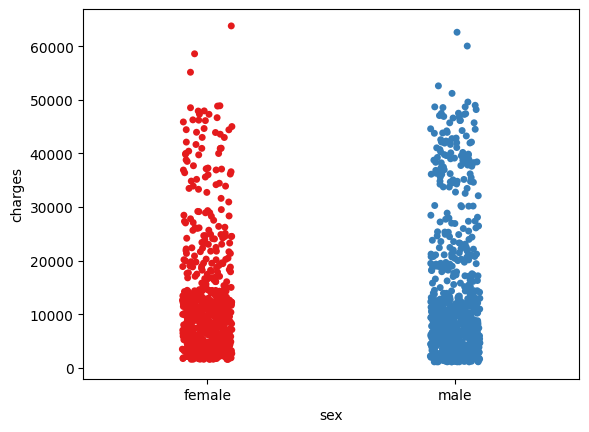

In [ ]:
# plotting the graph-

sns.stripplot(x= 'sex',y='charges',data=insurance,palette='Set1')
plt.show()

Inference-

The high number of patients from both sexes indicates that healthcare needs are universal and affect individuals regardless of gender. Men and women alike require medical care for preventive measures, treatment of illnesses, chronic condition management, and overall health maintenance. Healthcare services aim to cater to the needs of all genders, ensuring equal access to medical attention and support. The balanced representation of both sexes among patients highlights the inclusivity and recognition that health concerns impact individuals regardless of gender.

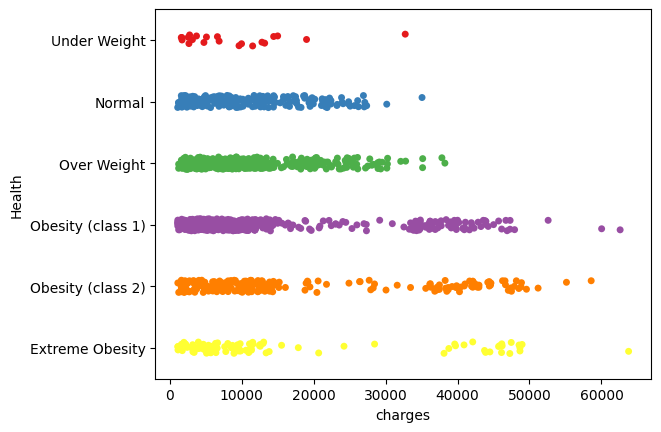

In [ ]:
# plotting the graph-

sns.stripplot(x= 'charges',y= 'Health',data=insurance,palette='Set1')
plt.show()

Inference-

The observation reveals that there is a significant increase in charges as the health status goes beyond normal. This can be attributed to the fact that individuals with poor health tend to visit hospitals and healthcare facilities more frequently than those with normal health. Higher healthcare utilization, including doctor visits, diagnostic tests, medications, and potential hospitalizations, leads to increased medical expenses. Insurance charges are directly related to people's health because insurance providers assess the potential risk and anticipated healthcare costs associated with insuring individuals with poorer health. The charges are adjusted to account for the higher likelihood of claims and the expected financial burden on the insurance company. Therefore, as charges increase, it reflects the direct correlation between the health status of individuals and the associated costs of providing them with healthcare coverage.

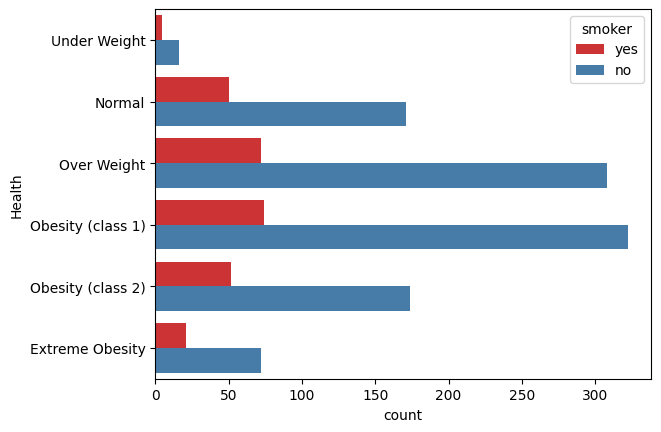

In [ ]:
# plotting the graph-

sns.countplot(y= 'Health',data=insurance,hue = 'smoker',palette='Set1')
plt.show()

Inference-

The observation indicates that the majority of smokers are individuals who are overweight or obese (class 1 and class 2). This can be attributed to factors such as interconnected lifestyle choices, the use of smoking as a coping mechanism, the addictive nature of smoking, the health implications of smoking and obesity, and the potential for a vicious cycle between smoking and weight-related concerns. Smoking is known to cause diseases and is directly related to health risks. The association between smoking and overweight/obesity highlights the impact of these factors on overall health.

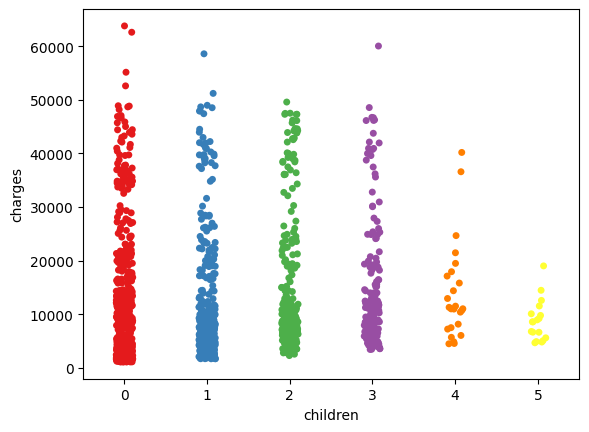

In [ ]:
# plotting the graph-

sns.stripplot(x= 'children',y= 'charges',data=insurance,palette='Set1')
plt.show()

Inference-

When purchasing insurance, people often choose to include their family members as dependents. Children under the age of 20 are typically included in the family plan at a set price, but once they reach the age of 20, they are treated as individuals and charged the adult rate. However, without information about the ages of the children, it is not possible to consider them for insurance charges. The lack of specific details regarding the children's ages makes it difficult to determine their eligibility and appropriate charges within the insurance plan.

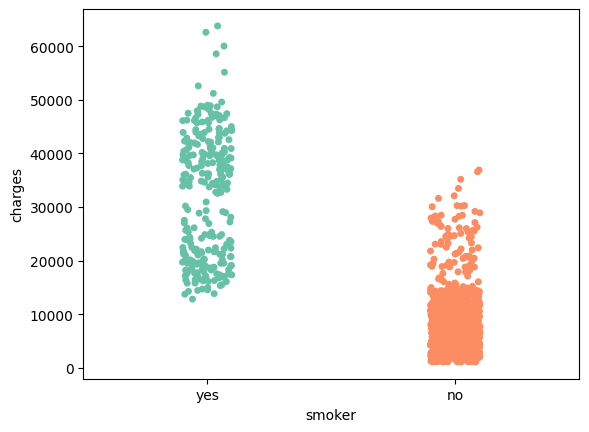

In [ ]:
# plotting the graph-

sns.stripplot(x= 'smoker',y= 'charges',data=insurance,palette='Set2')
plt.show()

Inference-

The observation indicates that charges are higher for patients who are smokers, suggesting a direct relationship between smoking status and increased charges. This can be attributed to the fact that individuals who smoke are more likely to develop diseases compared to non-smokers. Smoking is a known risk factor for various health conditions, including respiratory diseases, cardiovascular diseases, and certain types of cancer. As a result, smokers may require more frequent medical interventions, treatments, and medications, leading to higher healthcare expenses and consequently higher insurance charges. The increased prevalence of diseases among smokers contributes to the direct correlation between smoking status and the associated healthcare costs.

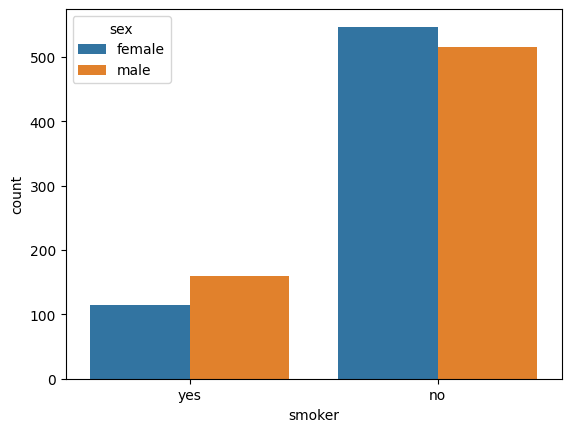

In [ ]:
# plotting the graph- 

sns.countplot(x = 'smoker',data=insurance,hue='sex')
plt.show()

Inference-

The majority of smokers are male, while females are less likely to smoke. This can be attributed to social and cultural norms, with smoking being more prevalent among males in some cultures. Males may turn to smoking as a means of stress relief or as a coping mechanism after a hard day's work. The addictive nature of smoking and targeted marketing towards males may also contribute to the higher prevalence among this group. On the other hand, females tend to be more health-conscious and aware of the risks associated with smoking, which may lead them to avoid smoking or take steps to quit if they have previously smoked. However, it's important to recognize that individual choices and circumstances can vary significantly.

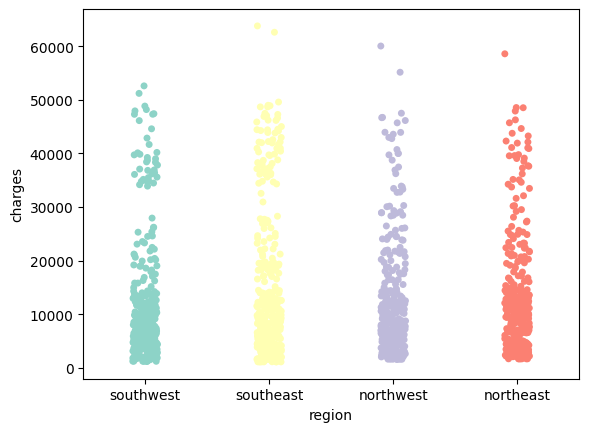

In [ ]:
# plotting the graph-

sns.stripplot(x= 'region',y= 'charges',data=insurance,palette='Set3')
plt.show()

Inference-

The location from which patients belong does not have any direct relation to insurance charges. Insurance charges are primarily determined based on factors such as the individual's health status, age, pre-existing conditions, and coverage options. Insurance companies assess the potential risks and associated costs of providing coverage for specific ailments, regardless of the patient's location. Therefore, location is not a significant factor in determining insurance charges as it does not directly impact the evaluation of medical needs or the financial considerations associated with providing coverage.

### Conclusion-

In conclusion, several factors impact insurance charges and healthcare decisions. Age, lifestyle choices (such as smoking and weight-related concerns), family dynamics, and gender differences play significant roles. Charges tend to increase with age due to higher health risks and associated expenses. Smoking and weight-related concerns contribute to increased risks and potential costs. Family plans include children under 20, while charges for individuals are applied after that age. Gender differences are observed in smoking patterns, with males more likely to smoke. Location does not directly affect insurance charges. Understanding these factors is crucial for assessing influences on insurance charges and healthcare decision-making.

### Machine learning-

In [ ]:
# taking y as target column-

y = insurance.charges
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# importing label enocder to make categorical data into numbers to increase readability for ml algorihtms-

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [ ]:
# the columns that needed to be encoded-

insurance['sex'] = enc.fit_transform(insurance['sex'])
insurance['smoker'] = enc.fit_transform(insurance['smoker'])

In [ ]:
# using get dummies to make categories into columns-

insurance = pd.get_dummies(insurance,columns= ['Health'])

In [ ]:
# taking x values for independent variables-

x = insurance.iloc[:,:]
x.drop('Age-group',axis=1,inplace=True)
x.drop('charges',axis=1,inplace=True)
x.drop('region',axis=1,inplace=True)
x.drop('children',axis=1,inplace=True)
x.head()


,age,sex,bmi,smoker,Health_Under Weight,Health_Normal,Health_Over Weight,Health_Obesity (class 1),Health_Obesity (class 2),Health_Extreme Obesity
0,19,0,27.900,1,0,0,1,0,0,0
1,18,1,33.770,0,0,0,0,1,0,0
2,28,1,33.000,0,0,0,0,1,0,0
3,33,1,22.705,0,0,1,0,0,0,0
4,32,1,28.880,0,0,0,1,0,0,0


In [ ]:
# importing train test split-

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# importing standardscaler to standradize the data-

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)
x

array([[-1.44041773, -1.00977099, -0.45315959, ..., -0.64871327,
        -0.45102144, -0.27342063],
       [-1.51164747,  0.99032355,  0.50942165, ...,  1.5415131 ,
        -0.45102144, -0.27342063],
       [-0.79935006,  0.99032355,  0.3831546 , ...,  1.5415131 ,
        -0.45102144, -0.27342063],
       ...,
       [-1.51164747, -1.00977099,  1.01448983, ..., -0.64871327,
         2.21718948, -0.27342063],
       [-1.29795825, -1.00977099, -0.79752426, ..., -0.64871327,
        -0.45102144, -0.27342063],
       [ 1.55123139, -1.00977099, -0.26129928, ..., -0.64871327,
        -0.45102144, -0.27342063]])

In [ ]:
# importing 5 machine learning algorithms with their metrics-

from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()

from sklearn.neighbors import KNeighborsRegressor
model_2 = KNeighborsRegressor()

from sklearn.ensemble import RandomForestRegressor
model_3 = RandomForestRegressor()

from sklearn.tree import DecisionTreeRegressor
model_4 = DecisionTreeRegressor()

from sklearn.svm import SVR
model_5 = SVR()

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

### Linear Regression

In [ ]:
# fitting the data and predicting- 

model_1.fit(x_train,y_train)

predict_1 = model_1.predict(x_test)

r2_score(y_test,predict_1)*100

ml = r2_score(y_test,predict_1)*100

print('Linear Regressor model  :' , ml)

Linear Regressor model  : 80.1526068615534


In [ ]:
ms_1 = mean_absolute_error(y_test,predict_1)

print('mean absolute error of model :' , ms_1)

mean absolute error of model : 4315.028298956425


### KNeighbors Regressor

In [ ]:
# fitting the data and predicting-

model_2.fit(x_train,y_train)

predict_2 = model_2.predict(x_test)

r2_score(y_test,predict_2)*100

ml_1 = r2_score(y_test,predict_2)*100

print('KNeighbors Regressor model  :' , ml_1)

KNeighbors Regressor model  : 14.133781051709192


In [ ]:
ms_2 = mean_absolute_error(y_test,predict_2)

print('mean absolute error of model_1 :' , ms_2)

mean absolute error of model_1 : 8273.037090100746


### RandomForest Regressor

In [ ]:
# fitting the data and predicting-

model_3.fit(x_train,y_train)

predict_3 = model_3.predict(x_test)

r2_score(y_test,predict_3)*100

ml_2 = r2_score(y_test,predict_3)*100

print('RandomForest Regressor model  :' , ml_2)

RandomForest Regressor model  : 88.41112771758701


In [ ]:
ms_3 = mean_absolute_error(y_test,predict_3)

print('mean absolute error of model_2 :' , ms_3)

mean absolute error of model_2 : 2625.445973708692


### DecisionTree Regressor

In [ ]:
# fitting the data and predicting-

model_4.fit(x_train,y_train)

predict_4 = model_4.predict(x_test)

r2_score(y_test,predict_4)*100

ml_3 = r2_score(y_test,predict_4)*100

print('DecisionTree Regressor model  :' , ml_3)

DecisionTree Regressor model  : 82.2664018943725


In [ ]:
ms_4 = mean_absolute_error(y_test,predict_4)

print('mean absolute error of model_3 :' , ms_4)

mean absolute error of model_3 : 2785.7087424962688


### Support Vector Regressor

In [ ]:
# fitting the data and predicting-

model_5.fit(x_train,y_train)

predict_5 = model_5.predict(x_test)

r2_score(y_test,predict_5)*100

ml_4 = r2_score(y_test,predict_5)*100

print('Support Vector Regressor model  :' , ml_4)

Support Vector Regressor model  : -13.44581834056382


In [ ]:
ms_5 = mean_absolute_error(y_test,predict_5)

print('mean absolute error of model_4 :' , ms_5)

mean absolute error of model_4 : 9255.029256202322


In [ ]:
import tensorflow as tf
from keras.models  import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(10, input_dim=10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='linear'))

model.compile(loss='MeanAbsolutePercentageError', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
model.fit(x,y, epochs=100, batch_size=10)

Epoch 1/100
134/134 [==============================] - 3s 3ms/step - loss: 99.9360 - mean_absolute_error: 13275.4395
Epoch 2/100
134/134 [==============================] - 0s 3ms/step - loss: 97.2349 - mean_absolute_error: 13138.7842
Epoch 3/100
134/134 [==============================] - 0s 3ms/step - loss: 77.5216 - mean_absolute_error: 11922.9854
Epoch 4/100
134/134 [==============================] - 0s 3ms/step - loss: 69.0213 - mean_absolute_error: 11078.5859
Epoch 5/100
134/134 [==============================] - 0s 3ms/step - loss: 66.2726 - mean_absolute_error: 10751.0264
Epoch 6/100
134/134 [==============================] - 0s 3ms/step - loss: 63.7320 - mean_absolute_error: 10309.8779
Epoch 7/100
134/134 [==============================] - 0s 3ms/step - loss: 61.1529 - mean_absolute_error: 10099.6533
Epoch 8/100
134/134 [==============================] - 0s 3ms/step - loss: 57.6355 - mean_absolute_error: 9701.1416
Epoch 9/100
134/134 [==============================] - 0s 3ms/ste

In [ ]:
predict_dl = model.predict(x_test)

9/9 [==============================] - 0s 2ms/step


The mean absolute error is suppose to be 0 or the value nearest to 0 generally indicates better performance of a regression model, as it means the model is making fewer errors compared to other machine learning models.

so mean absolute error of model_3(Random Forest Regressor) is the lowest at 2642.

we consider Random Forest Regressor as best fit model.